In [2]:
import shap
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir("..")

# Load model and data
model = joblib.load('models/churn_xgboost_model.pkl')
X_test = pd.read_csv('data/processed/X_test.csv')
encoder = joblib.load('models/onehot_encoder.pkl')
feature_names = joblib.load('models/feature_columns.pkl')

# Ensure column order
X_test = X_test[feature_names]

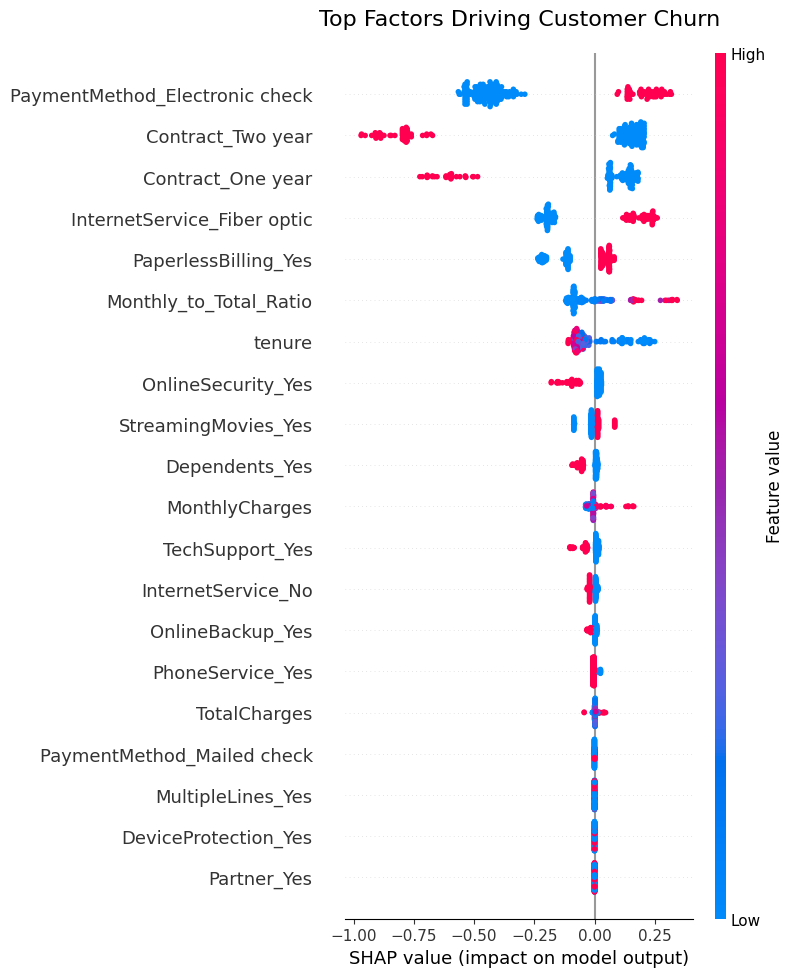

In [3]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test[:200])  # Sample for speed

plt.figure(figsize=(10, 7))
shap.summary_plot(shap_values, X_test[:200], feature_names=feature_names, show=False)
plt.title("Top Factors Driving Customer Churn", fontsize=16, pad=20)
plt.savefig('dashboard/assets/shap_summary.png', dpi=150, bbox_inches='tight')
plt.show()

<Figure size 1000x300 with 0 Axes>

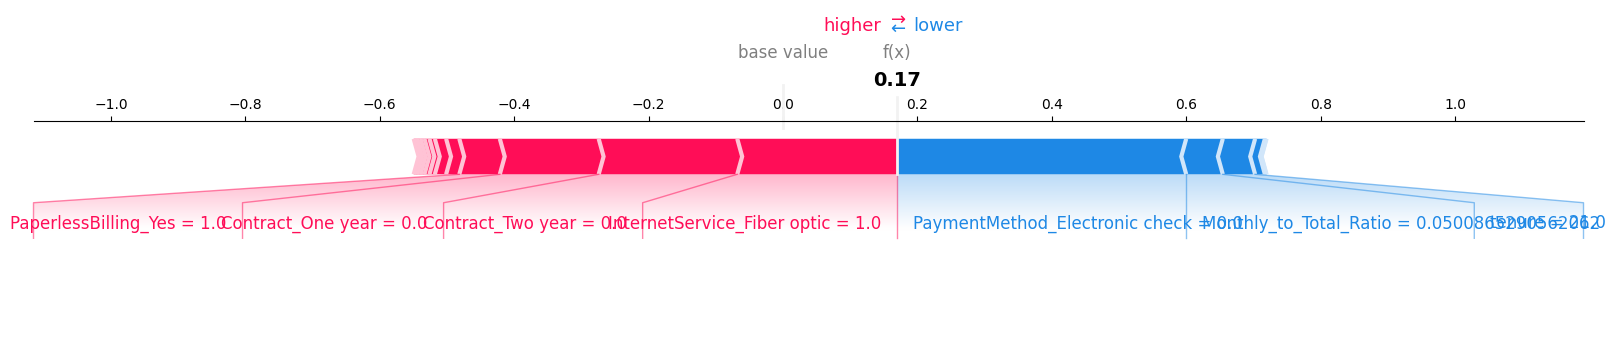

In [4]:
customer_idx = 5
customer_data = X_test.iloc[[customer_idx]]

shap_values_single = explainer.shap_values(customer_data)

# Force Plot (Save as HTML for interactivity)
shap.initjs()
force_plot = shap.force_plot(explainer.expected_value, shap_values_single, customer_data, show=False)
shap.save_html('dashboard/assets/shap_force.html', force_plot)

# Or save as PNG using matplotlib
plt.figure(figsize=(10, 3))
shap.force_plot(explainer.expected_value, shap_values_single, customer_data, matplotlib=True, show=False)
plt.savefig('dashboard/assets/shap_force.png', dpi=150, bbox_inches='tight')
plt.show()

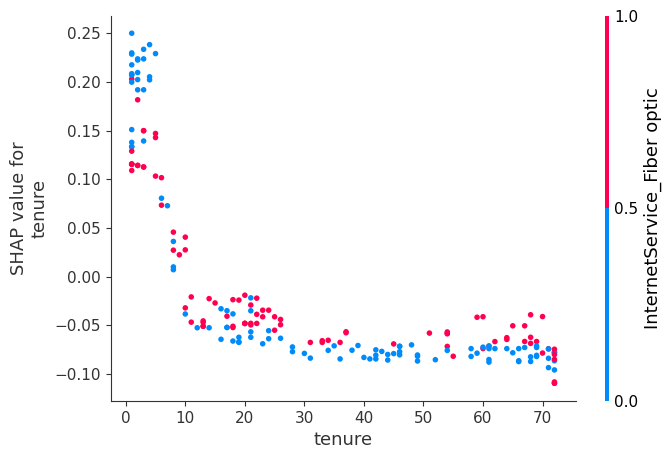

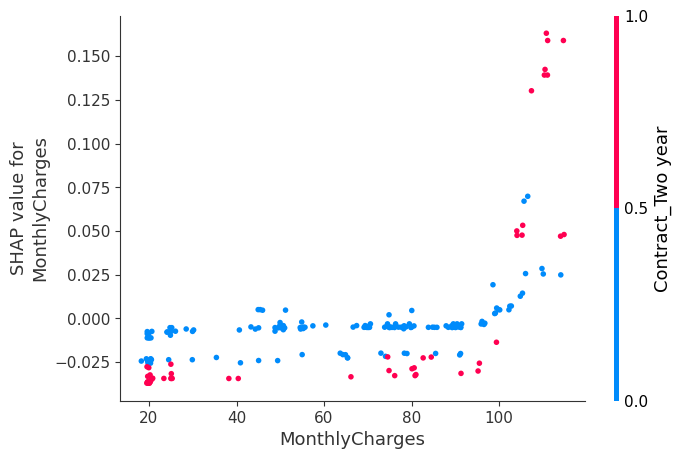

In [9]:
# Tenure vs Churn Risk
shap.dependence_plot("tenure", shap_values, X_test[:200], show=False)
plt.savefig('dashboard/assets/dependence_tenure.png', dpi=150, bbox_inches='tight')
plt.show()

# MonthlyCharges vs Contract interaction
shap.dependence_plot(
    "MonthlyCharges",
    shap_values,
    X_test[:200],
    interaction_index="auto",  # Let SHAP choose best interacting feature
    show=False
)
plt.savefig('dashboard/assets/dependence_monthly_contract_auto.png', dpi=150, bbox_inches='tight')
plt.show()

In [7]:
['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', ...]

['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', Ellipsis]